![](../JFM-notebooks-logo.jpg)

In [3]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
import cmocean

# Aesthetics
sns.set_theme()
sns.set_style('ticks')
sns.set_context('paper')
plt.rc('mathtext', fontset='stix')
plt.rc('font', family='serif')
plt.rc('axes', grid=True)

import pandas as pd

### Load energy budget data

In [4]:
df = pd.read_csv('../data/budget_data.csv')
df.head()

Gr   Pr      Re         I        qm        qp      epsm     epsmu  \
0  1000000.0  1.0   316.0  0.002472  0.030449  0.013969  0.012863  0.001670   
1  1000000.0  1.0   562.0  0.007918  0.036822  0.010876  0.019603  0.005304   
2  1000000.0  1.0  1000.0  0.025939  0.045193  0.007779  0.035735  0.017285   
3  1000000.0  1.0  1780.0  0.015718  0.010077  0.000868  0.014825  0.010417   
4  1000000.0  1.0  3160.0  0.010580  0.002078  0.000094  0.007692  0.006733   

      epsmw      epsp  ...        Pw        PT      chip      chim        qT  \
0  0.011193  0.033551  ...  0.019192  0.002939  0.002912  0.003435  0.006370   
1  0.014299  0.035359  ...  0.022422  0.002732  0.002709  0.003244  0.005976   
2  0.018450  0.042558  ...  0.026743  0.002530  0.002510  0.003044  0.005571   
3  0.004408  0.011659  ...  0.005675  0.001383  0.001369  0.001613  0.002996   
4  0.000959  0.004958  ...  0.001112  0.000926  0.000918  0.000924  0.001849   

          Re0        Red       Red0        UL      tauw  
0  431.550478  36.837412  31.672506  0.470723  0.018384  
1  431.550478  48.827736  31.672506  0.553630  0.019875  
2  431.550478  61.144196  31.672506  0.655619  0.021490  
3  431.550478  81.553227  31.672506  0.442949  0.007479  
4  431.550478  85.173360  31.672506  0.273754  0.002583  

[5 rows x 21 columns]

### Set parameter-dependent figure aesthetics

In [5]:
def Pr_mark(Pr):
    if Pr==1:
        return 'o'
    elif Pr==4:
        return '^'
    else:
        return 'v'
        
camp = sns.color_palette('flare', as_cmap=True)
cspeed = cmocean.tools.crop_by_percent(cmocean.cm.tempo, 30, which='both', N=None)

def Re_col(lR):
    return camp((lR - 2.5)/1.5)

def Gr_col(lG):
    return cspeed((lG - 6)/2)

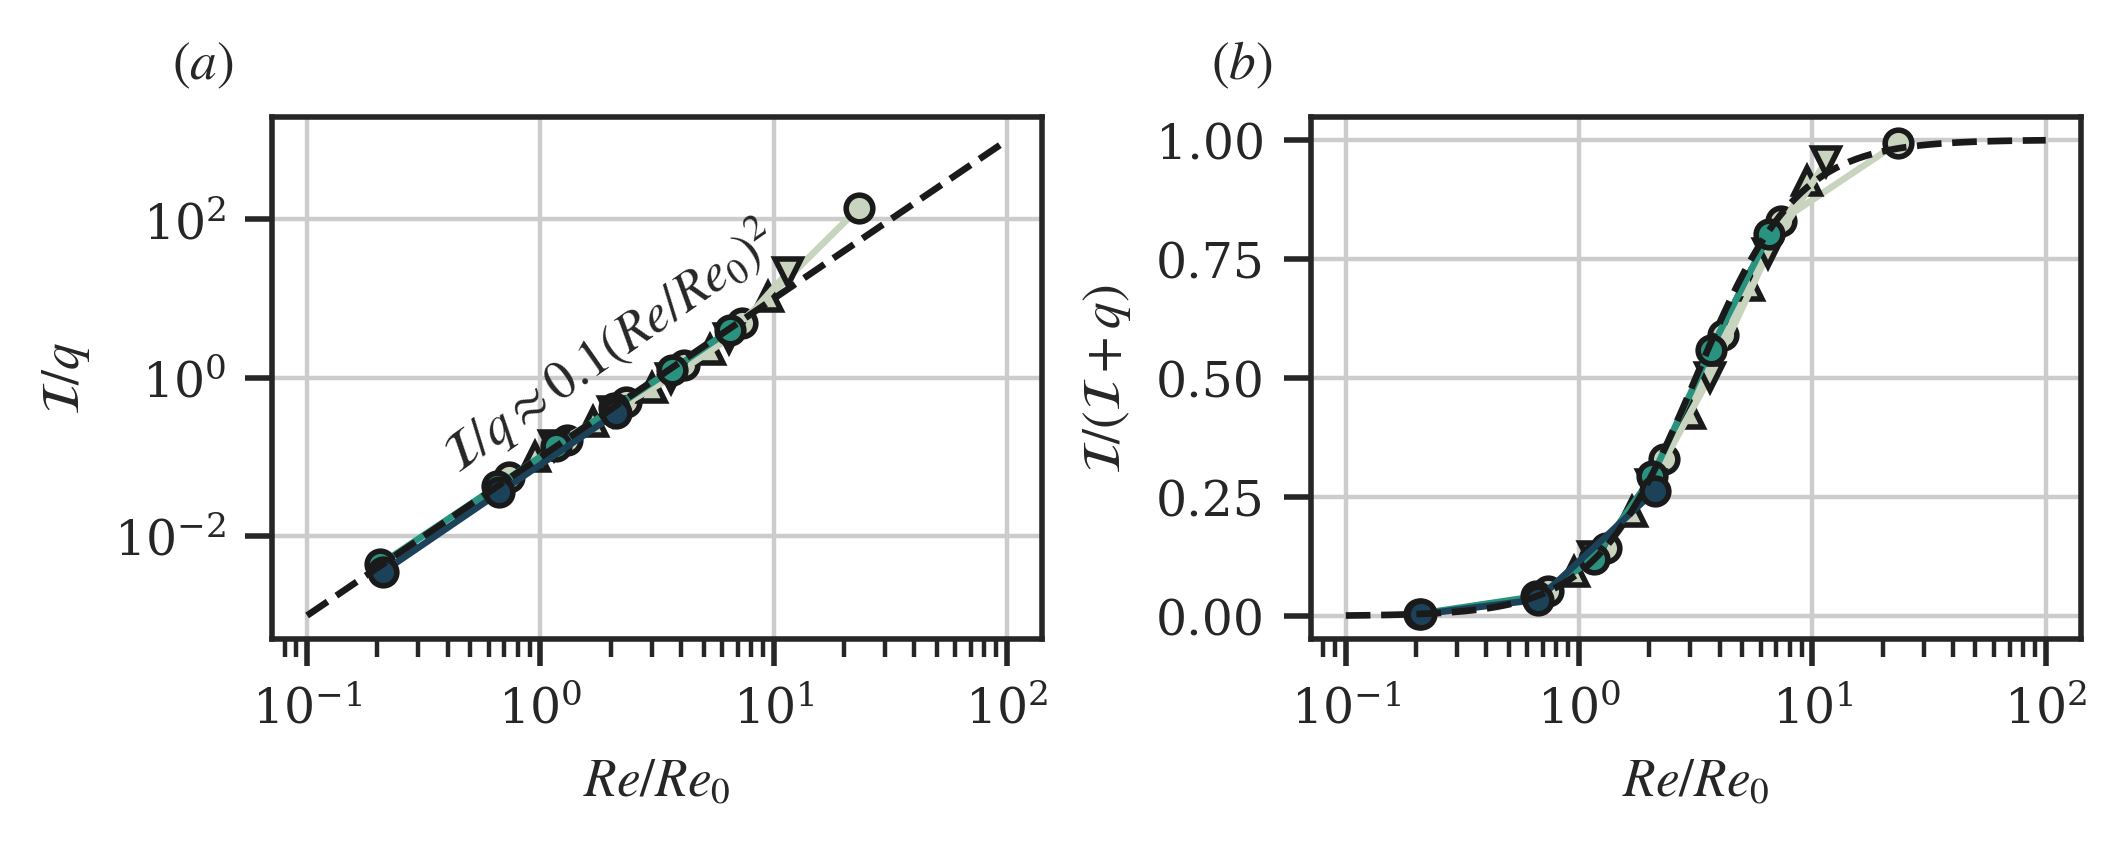

In [6]:
fig, axs = plt.subplots(1,2, figsize=(5.2,2.0), dpi=200, layout='constrained')
for Gr in df.Gr.unique():
    for Pr in df.Pr.unique():
        sdf = df[(df.Gr==Gr) & (df.Pr==Pr)].sort_values('Re')
        axs[0].plot(sdf.Re/sdf.Re0, (sdf.I)/(sdf.qm + sdf.qp), marker=Pr_mark(Pr), color=Gr_col(np.log10(Gr)), markeredgecolor='k')
        axs[1].plot(sdf.Re/sdf.Re0, (sdf.I)/(sdf.I + sdf.qm + sdf.qp), marker=Pr_mark(Pr), color=Gr_col(np.log10(Gr)), markeredgecolor='k')

Rr = 10**np.linspace(-1,2,101)
axs[0].loglog(Rr, 0.1*Rr**2, 'k--')
axs[1].semilogx(Rr, Rr**2/(Rr**2 + 10), 'k--')
for ax in axs:
    ax.set_xlabel('$Re/Re_0$')
axs[0].set_ylabel('$\mathcal{I}/q$')
axs[1].set_ylabel('$\mathcal{I}/(\mathcal{I} + q)$')
axs[0].annotate('$\mathcal{I}/q \\approx 0.1 (Re/Re_0)^2$', (2, 2.5), rotation=35, ha='center', va='center')

axs[0].annotate('$(a)$', (-0.05, 1.05), xycoords='axes fraction', ha='right', va='bottom')
axs[1].annotate('$(b)$', (-0.05, 1.05), xycoords='axes fraction', ha='right', va='bottom')

# fig.savefig('total_KE_budget.pdf')

plt.show()